<a href="https://colab.research.google.com/github/anubindadash/Projects-by-AD/blob/main/Statistical_Methods_for_Decision_Making_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as py
import io
import math
import statistics
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Survey.csv to Survey (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Survey.csv']))
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


#2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


2.1.1. Gender and Major


In [ ]:
data_con1 = pd.crosstab(df['Gender'],  
                            df['Major'], 
                                margins = True) 
data_con1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention


In [ ]:
data_con2 = pd.crosstab(df['Gender'],  
                            df['Grad Intention'], 
                                margins = True) 
data_con2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.1.3. Gender and Employment


In [ ]:
data_con3 = pd.crosstab(df['Gender'],  
                            df['Employment'], 
                                margins = True) 
data_con3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.1.4. Gender and Computer


In [ ]:
data_con4 = pd.crosstab(df['Gender'],  
                            df['Computer'], 
                                margins = True) 
data_con4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [ ]:
df1 = df.query("Gender=='Male'")
mpro=df1['Gender'].value_counts()/len(df)
mpro

Male    0.467742
Name: Gender, dtype: float64

What is the probability that a randomly selected CMSU student will be female?

In [ ]:
df2 = df.query("Gender=='Female'")
fpro=df2['Gender'].value_counts()/len(df)
fpro

Female    0.532258
Name: Gender, dtype: float64

2.2.2. Find the conditional probability of different majors among the male students in CMSU.

In [ ]:
malemajor = df.query("Gender=='Male'")
malemajor.groupby(['Major','Gender']).size().div(len(malemajor))

Major                   Gender
Accounting              Male      0.137931
CIS                     Male      0.034483
Economics/Finance       Male      0.137931
International Business  Male      0.068966
Management              Male      0.206897
Other                   Male      0.137931
Retailing/Marketing     Male      0.172414
Undecided               Male      0.103448
dtype: float64

Find the conditional probability of different majors among the female students of CMSU.

In [ ]:
femalemajor = df.query("Gender=='Female'")
femalemajor.groupby(['Major','Gender']).size().div(len(femalemajor))

Major                   Gender
Accounting              Female    0.090909
CIS                     Female    0.090909
Economics/Finance       Female    0.212121
International Business  Female    0.121212
Management              Female    0.121212
Other                   Female    0.090909
Retailing/Marketing     Female    0.272727
dtype: float64

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.

In [ ]:
malegrad = df.query("Gender=='Male'")
malegrad.groupby(['Grad Intention','Gender']).size().div(len(malegrad))

Grad Intention  Gender
No              Male      0.103448
Undecided       Male      0.310345
Yes             Male      0.586207
dtype: float64

Find the conditional probability of intent to graduate, given that the student is a female.

In [ ]:
femalegrad = df.query("Gender=='Female'")
femalegrad.groupby(['Grad Intention','Gender']).size().div(len(femalegrad))

Grad Intention  Gender
No              Female    0.272727
Undecided       Female    0.393939
Yes             Female    0.333333
dtype: float64

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [ ]:
gender_probs=df.groupby('Gender').size().div(len(df))
cond1=df.groupby(['Employment', 'Gender']).size().div(len(df)).div(gender_probs, axis=0, level='Gender')   #Used this code because the question says to find out for men and women in one line. 
cond1

Employment  Gender
Full-Time   Female    0.090909
            Male      0.241379
Part-Time   Female    0.727273
            Male      0.655172
Unemployed  Female    0.181818
            Male      0.103448
dtype: float64

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [ ]:
laptoppref = df.query("Computer=='Laptop'")
laptoppref.groupby(['Computer','Gender']).size().div(len(laptoppref))

Computer  Gender
Laptop    Female    0.527273
          Male      0.472727
dtype: float64

# 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

In [ ]:
acc= df.query("Major=='Accounting'")
accpro=acc['Major'].value_counts()/len(df)
accpro                                               #P(Accounting)

Accounting    0.112903
Name: Major, dtype: float64

In [ ]:
cis= df.query("Major=='CIS'")
cispro=cis['Major'].value_counts()/len(df)
cispro                                               #P(CIS)                     

CIS    0.064516
Name: Major, dtype: float64

In [ ]:
eco= df.query("Major=='Economics/Finance'")
ecopro=eco['Major'].value_counts()/len(df)
ecopro                                                #P(Economics/Finance)

Economics/Finance    0.177419
Name: Major, dtype: float64

In [ ]:
IBs= df.query("Major=='International Business'")
IBspro=IBs['Major'].value_counts()/len(df)
IBspro                                                #P(International Business)

International Business    0.096774
Name: Major, dtype: float64

In [ ]:
mgmt= df.query("Major=='Management'")
mgmtpro=mgmt['Major'].value_counts()/len(df)
mgmtpro                                               #P(Management)

Management    0.16129
Name: Major, dtype: float64

In [ ]:
other= df.query("Major=='Other'")
otherpro=other['Major'].value_counts()/len(df)
otherpro                                              #P(Other)

Other    0.112903
Name: Major, dtype: float64

In [ ]:
retmar= df.query("Major=='Retailing/Marketing'")
retmarpro=retmar['Major'].value_counts()/len(df)
retmarpro                                                #P(Retailing/Marketing)

Retailing/Marketing    0.225806
Name: Major, dtype: float64

# Part II

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

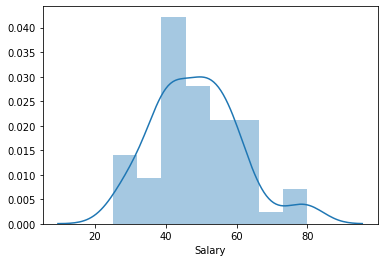

In [ ]:
sns.distplot(df['Salary'])

The graph does not give us a clear picture of the data, hence we should go for Shapiro test

In [ ]:
a=py.stats.shapiro(df['Salary'])
a

(0.9565857648849487, 0.028001394122838974)

Here, since the p value is less than 0.05, hence we can clearly say that the distribution for the above data is not normal.

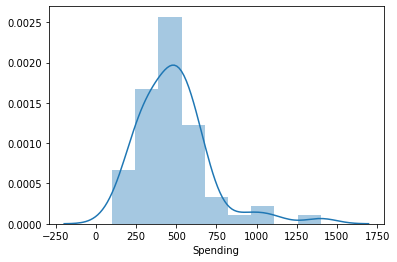

In [ ]:
sns.distplot(df['Spending'])

The graph does not give us a clear picture of the data, hence we should go for Shapiro test


In [ ]:
b=py.stats.shapiro(df['Spending'])
b    

(0.8777452111244202, 1.6854661225806922e-05)

Here, since the p value is much less than 0.05, hence we can clearly say that the distribution for the above data is not normal. 

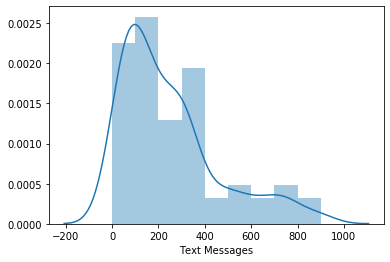

In [ ]:
sns.distplot(df['Text Messages'])

The graph does not give us a clear picture of the data, hence we should go for Shapiro test

In [ ]:
c=py.stats.shapiro(df['Text Messages'])
c

(0.8594191074371338, 4.324040673964191e-06)